<a href="https://colab.research.google.com/github/SaifAddeenJihad/Brain_Tumor_Classification/blob/main/Brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL.Image import open
from skimage.io import imread
from sklearn.model_selection import train_test_split
import keras
from keras import Sequential
from keras.layers import Dense
from keras.preprocessing import image




**Load Excel Data From drive**

In [4]:
brain_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Brain Tumor.csv')
print(brain_df.head())

    Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e

In [2]:
brain_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Brain Tumor.csv',usecols=[0,1])
print(brain_df.head())



    Image  Class
0  Image1      0
1  Image2      0
2  Image3      1
3  Image4      1
4  Image5      0


**Merg Image path with Data labels**

In [3]:
path_list = []
base_path = '/content/drive/MyDrive/Colab Notebooks/data/Brain Tumor/Brain Tumor'
for entry in os.listdir(base_path):
    path_list.append( os.path.join(base_path,entry))
pathes_dict={os.path.splitext(os.path.basename(x))[0]: x for x in path_list}
brain_df['pathes'] = brain_df['Image'].map(pathes_dict.get)
print(brain_df.head())


    Image  Class                                             pathes
0  Image1      0  /content/drive/MyDrive/Colab Notebooks/data/Br...
1  Image2      0  /content/drive/MyDrive/Colab Notebooks/data/Br...
2  Image3      1  /content/drive/MyDrive/Colab Notebooks/data/Br...
3  Image4      1  /content/drive/MyDrive/Colab Notebooks/data/Br...
4  Image5      0  /content/drive/MyDrive/Colab Notebooks/data/Br...


**Images Sample**

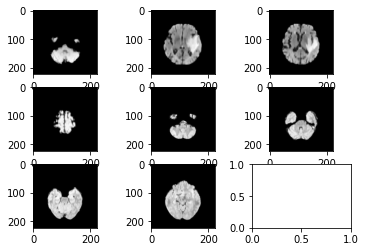

In [4]:
for x in range (0 ,9):
    img = open(brain_df['pathes'][x]).resize((224,224))
    plt.imshow(img)
    plt.subplot(3,3,x+1)
plt.show()

**Save resized images and labels in drive**

In [6]:

X, y= [], []
for  n in range(0,brain_df.shape[0]):
    img= open(brain_df['pathes'][n]).resize((224,224))
    X.append(np.asarray(img))
    y.append(brain_df['Class'][n])
X = np.array(X)
np.save('/content/drive/MyDrive/Colab Notebooks/data/x', X)
y = np.array(y)
np.save('/content/drive/MyDrive/Colab Notebooks/data/y', y)
print(X.shape)

(3762, 224, 224, 3)


**Splitting and scaling the data** 

In [2]:
X=np.load('/content/drive/MyDrive/Colab Notebooks/data/images_as_array.npy')
y=np.load('/content/drive/MyDrive/Colab Notebooks/data/labels.npy')
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


**Build the model and compile**

In [3]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(224,224,3)))
model.add(keras.layers.Dense(1000,activation='relu'))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer="sgd",metrics=["accuracy"])

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 1000)              150529000 
                                                                 
 dense_1 (Dense)             (None, 300)               300300    
                                                                 
 dense_2 (Dense)             (None, 1)                 301       
                                                                 
Total params: 150,829,601
Trainable params: 150,829,601
Non-trainable params: 0
_________________________________________________________________
None


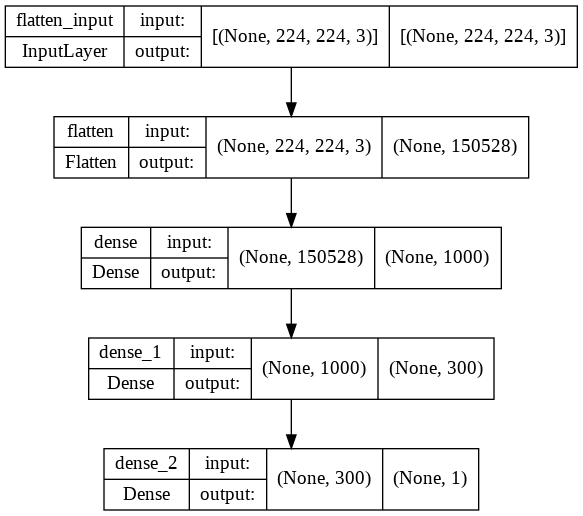

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
keras.utils.plot_model(model, "/content/drive/MyDrive/Colab Notebooks/data/MyModel.png", show_shapes=True)

**Fit the model**

In [4]:
checkpoint = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/data/MyModel.h5', save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train,epochs=50,validation_split=0.1,callbacks= [checkpoint,early_stopping])


Epoch 1/50
80/80 [==============================] - 12s 124ms/step - loss: 0.5509 - accuracy: 0.7297 - val_loss: 0.5247 - val_accuracy: 0.7208
Epoch 2/50
80/80 [==============================] - 6s 71ms/step - loss: 0.4747 - accuracy: 0.7805 - val_loss: 0.4834 - val_accuracy: 0.7633
Epoch 3/50
80/80 [==============================] - 6s 70ms/step - loss: 0.4574 - accuracy: 0.7868 - val_loss: 0.4237 - val_accuracy: 0.8057
Epoch 4/50
80/80 [==============================] - 5s 69ms/step - loss: 0.4212 - accuracy: 0.8097 - val_loss: 0.4235 - val_accuracy: 0.8021
Epoch 5/50
80/80 [==============================] - 5s 69ms/step - loss: 0.3757 - accuracy: 0.8341 - val_loss: 0.4165 - val_accuracy: 0.7951
Epoch 6/50
80/80 [==============================] - 2s 27ms/step - loss: 0.3529 - accuracy: 0.8491 - val_loss: 0.4664 - val_accuracy: 0.7456
Epoch 7/50
80/80 [==============================] - 6s 70ms/step - loss: 0.3202 - accuracy: 0.8554 - val_loss: 0.2974 - val_accuracy: 0.8834
Epoch 8/50


**load best model and evaluate on test set**

In [7]:
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/data/MyModel.h5")

In [9]:

test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(test_acc,test_loss)
y_pred=model.predict(X_test_scaled)


30/30 [==============================] - 1s 14ms/step - loss: 0.1549 - accuracy: 0.9543
0.9543039202690125 0.15488551557064056


**Visualize the results**

<function matplotlib.pyplot.show>

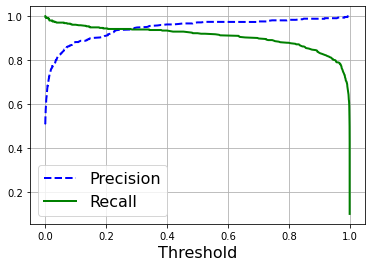

In [5]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.legend(loc="lower left", fontsize=16) 
plt.xlabel("Threshold", fontsize=16)        
plt.grid(True)                              

plt.show

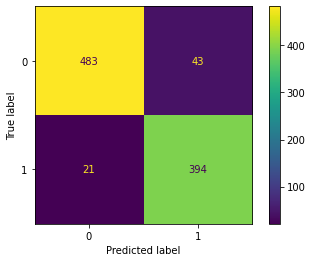

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred=model.predict(X_test_scaled)
y_pred_pre=[]
for n in y_pred:
  if n>0.15:
    y_pred_pre.append(1)
  else :
    y_pred_pre.append(0)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_pre)
plt.savefig("ConfusionMatrix.png", format="png")
plt.show()

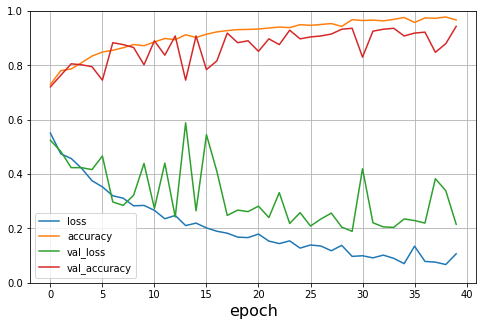

In [6]:

pd.DataFrame(history.history).plot(figsize=(8 , 5))
plt.grid(True)
plt.xlabel("epoch", fontsize=16) 
plt.gca().set_ylim(0 , 1)
plt.savefig("loss_and_accuracy.png", format="png")
plt.show()